# Análise de Dados Eleitorais Manaus 1o turno

Meus contatos: https://linktr.ee/fmasanori

Agradecimentos à primeira turma do curso Desenvolvimento em Software Multiplataforma, da FATEC São José dos Campos, que desenvolveu este projeto, inicialmente para a [TV Vanguarda](http://vanguarda.tv/). Em especial à Monique Carniello.

ATENÇÃO: na primeira tela de instalação do Python, habilite a opção PATH, note que **não** é o padrão.

Instalar o Python 3.6 ou superior (sugerimos não usar Anaconda) <br>
https://python.org.br/instalacao-windows/ <br>
https://python.org.br/instalacao-linux/ <br>
https://python.org.br/instalacao-mac/ <br>

Após instalar o Python, abra o terminal (Linha de Comando) e instale as bibliotecas necessárias:<br>
<br>
**pip install pandas matplotlib jupyter numpy**

Arquivos necessários:<br> 
https://cdn.tse.jus.br/estatistica/sead/odsele/perfil_eleitor_secao/perfil_eleitor_secao_ATUAL_AM.zip
https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/buweb/bweb_1t_AM_051020221321.zip<br>
<br>
**Descompactar em c:\users\seunome**<br>
<br>

# Primeira parte: Perfil do Eleitorado
<br>
<br>


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
estado = pd.read_csv("perfil_eleitor_secao_ATUAL_SP.csv", 
                 usecols = '''NR_ZONA NR_SECAO NM_MUNICIPIO DS_FAIXA_ETARIA DS_ESTADO_CIVIL DS_GRAU_ESCOLARIDADE 
                 QT_ELEITORES_INC_NM_SOCIAL QT_ELEITORES_PERFIL'''.split(),
                 sep=";", encoding='Latin 1')
municipio = estado.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO')

In [28]:
municipio.sample(20)

,NR_ZONA,NR_SECAO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_INC_NM_SOCIAL
6512288,411,35,SOLTEIRO,65 a 69 anos,ENSINO MÉDIO COMPLETO,3,0
1693572,127,573,SOLTEIRO,35 a 39 anos,SUPERIOR INCOMPLETO,1,0
9354179,412,24,DIVORCIADO,55 a 59 anos,ENSINO MÉDIO COMPLETO,2,0
12725342,411,173,SOLTEIRO,18 anos,ENSINO MÉDIO INCOMPLETO,1,0
8050112,412,191,VIÚVO,65 a 69 anos,ENSINO FUNDAMENTAL INCOMPLETO,1,0
2148833,412,293,DIVORCIADO,60 a 64 anos,ENSINO FUNDAMENTAL INCOMPLETO,1,0
12182497,411,378,DIVORCIADO,70 a 74 anos,ENSINO MÉDIO COMPLETO,1,0
2086413,282,56,CASADO,25 a 29 anos,ENSINO MÉDIO COMPLETO,2,0
9301694,412,495,SOLTEIRO,55 a 59 anos,SUPERIOR INCOMPLETO,2,0
2152949,412,319,SOLTEIRO,25 a 29 anos,ENSINO FUNDAMENTAL INCOMPLETO,1,0


## Faixa Etária 


In [29]:
FaixaEtaria = municipio.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
FaixaEtaria

DS_FAIXA_ETARIA
100 anos ou mais      723
16 anos               746
17 anos              2893
18 anos              5815
19 anos              7778
20 anos              8401
21 a 24 anos        39882
25 a 29 anos        52836
30 a 34 anos        55398
35 a 39 anos        59060
40 a 44 anos        62182
45 a 49 anos        52104
50 a 54 anos        46229
55 a 59 anos        43072
60 a 64 anos        37983
65 a 69 anos        31511
70 a 74 anos        22654
75 a 79 anos        13948
80 a 84 anos         7599
85 a 89 anos         4097
90 a 94 anos         2205
95 a 99 anos         1470
Inválido                2
Name: QT_ELEITORES_PERFIL, dtype: int64

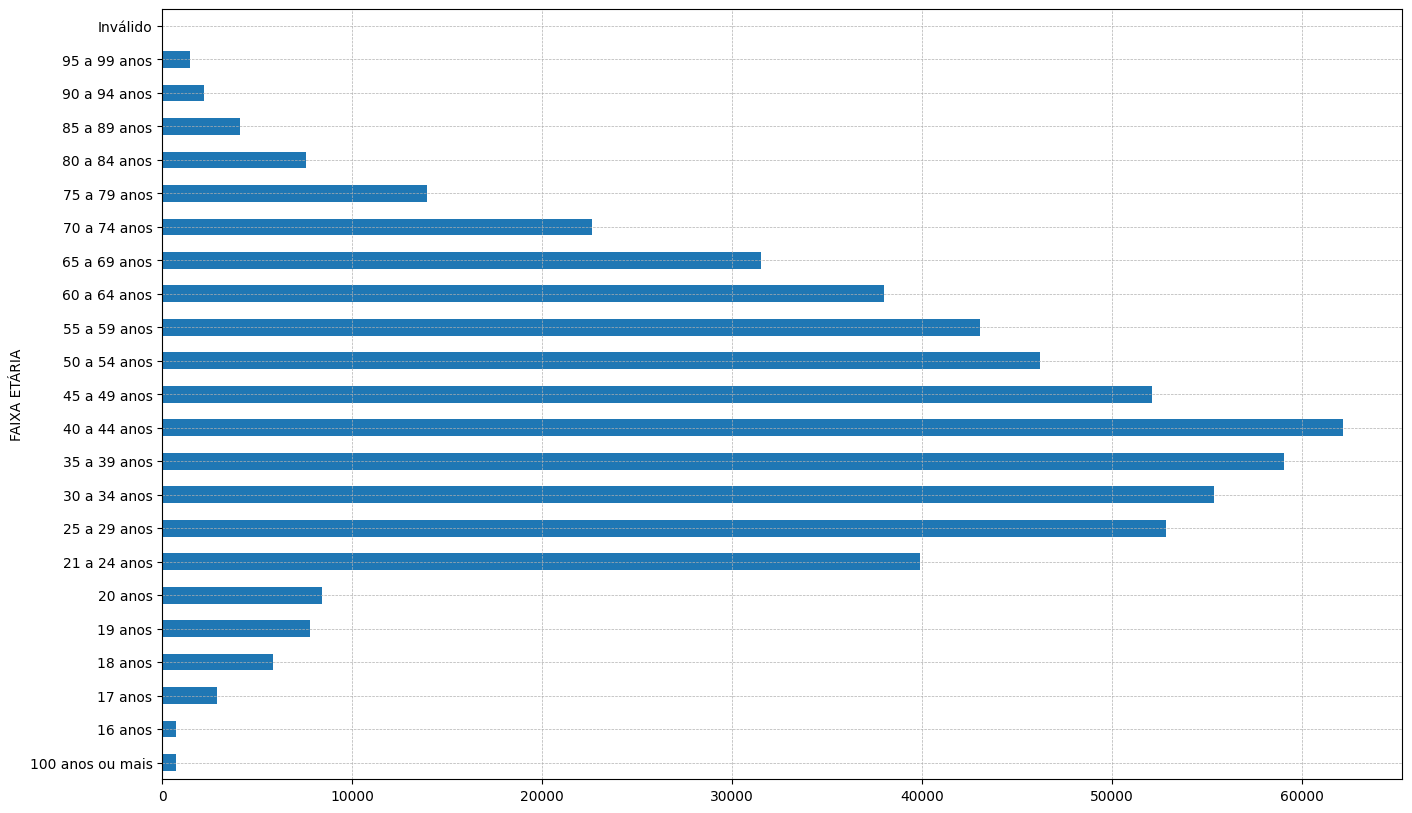

In [30]:
FaixaEtaria.plot(kind='barh', figsize=(16,10))
plt.ylabel('FAIXA ETÁRIA')
plt.grid(linestyle = '--', linewidth = 0.5)


## Agrupamento da faixa etária

In [31]:
Jovem = FaixaEtaria[1:8] 
Adulto = FaixaEtaria[8:14] 
Idoso = FaixaEtaria[14:22] 

In [32]:
FaixasIdade = pd.DataFrame({'Manaus':[Jovem.sum(), Adulto.sum(), Idoso.sum() + int(FaixaEtaria[0])]},
                        #somando idosos acima de 100 anos que estão no ínício
                        index = ['Jovens até 29 anos', 'Adultos', 'Idosos a partir de 60'])
FaixasIdade

,Manaus
Jovens até 29 anos,118351
Adultos,318045
Idosos a partir de 60,122190


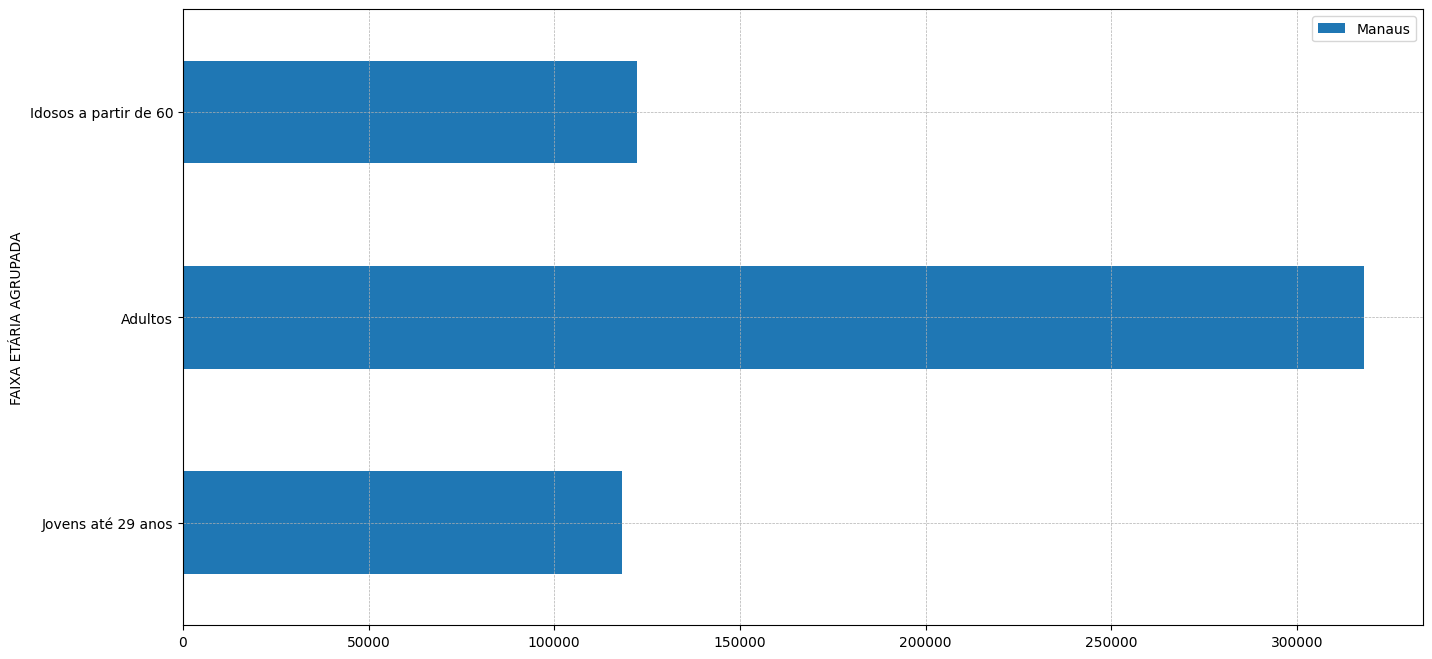

In [33]:
FaixasIdade.plot(kind='barh', figsize=(16,8))
plt.ylabel('FAIXA ETÁRIA AGRUPADA')
plt.grid(linestyle = '--', linewidth = 0.5)


## Zonas Eleitorais com mais jovens e mais idosos

In [34]:
jovens = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    jovens[zona] = result[1:8].sum()
for zona in sorted(jovens, key=lambda x:jovens[x], reverse = True):
    print (f'Zona eleitoral {zona}: {jovens[zona]}')

Zona eleitoral 412: 39878
Zona eleitoral 411: 32447
Zona eleitoral 127: 27707
Zona eleitoral 282: 18319


In [35]:
idosos = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    idosos[zona] = result[14:22].sum() + int(result[0])
for zona in sorted(idosos, key=lambda x:idosos[x], reverse = True):
    print (f'Zona eleitoral {zona}: {idosos[zona]}')

Zona eleitoral 412: 39007
Zona eleitoral 127: 35101
Zona eleitoral 411: 29974
Zona eleitoral 282: 18108


## Estado Civil

In [36]:
EstadoCivil = municipio.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().sort_values(ascending=False)
EstadoCivil

DS_ESTADO_CIVIL
CASADO                    250104
SOLTEIRO                  247786
DIVORCIADO                 34900
VIÚVO                      17077
SEPARADO JUDICIALMENTE      8706
NÃO INFORMADO                 15
Name: QT_ELEITORES_PERFIL, dtype: int64

## Escolaridade


In [37]:
Escolaridade = municipio.groupby(['DS_GRAU_ESCOLARIDADE'])['QT_ELEITORES_PERFIL'].sum().sort_values(ascending = False)
Escolaridade

DS_GRAU_ESCOLARIDADE
ENSINO MÉDIO COMPLETO            213996
SUPERIOR COMPLETO                117784
ENSINO FUNDAMENTAL INCOMPLETO     76698
ENSINO MÉDIO INCOMPLETO           59625
ENSINO FUNDAMENTAL COMPLETO       36900
SUPERIOR INCOMPLETO               36323
LÊ E ESCREVE                      10353
ANALFABETO                         6909
Name: QT_ELEITORES_PERFIL, dtype: int64

## Salvar Dados

In [38]:
FaixasIdade.to_csv('FaixasIdade.csv')
EstadoCivil.to_csv('EstadoCivil.csv')
Escolaridade.to_csv('Escolaridade.csv')

## Nome social


In [39]:
NomeSocial = municipio.groupby(['QT_ELEITORES_INC_NM_SOCIAL'])['QT_ELEITORES_PERFIL'].count()
NomeSocial[1]

128

# Zonas Eleitorais com mais pessoas que utilizam nome social

In [40]:
nome_social = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('QT_ELEITORES_INC_NM_SOCIAL')['QT_ELEITORES_PERFIL'].count()
    nome_social[zona] = result[1]
for zona in sorted(nome_social, key=lambda x:nome_social[x], reverse = True):
    print (f'Zona eleitoral {zona}: {nome_social[zona]}')

Zona eleitoral 412: 44
Zona eleitoral 127: 37
Zona eleitoral 411: 31
Zona eleitoral 282: 16


# Segunda parte: análise dos boletins de urna do 1o turno
<br>
<br>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
estado = pd.read_csv("bweb_1t_SP_051020221321.csv", 
                 usecols = '''NR_ZONA NR_SECAO NM_MUNICIPIO QT_COMPARECIMENTO QT_APTOS QT_COMPARECIMENTO 
                 QT_ABSTENCOES NR_VOTAVEL NM_VOTAVEL QT_VOTOS DS_CARGO_PERGUNTA'''.split(),
                 sep=";", encoding='Latin 1')
municipio = estado.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS" and DS_CARGO_PERGUNTA == "Presidente"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO DS_CARGO_PERGUNTA'.split())

In [43]:
municipio.sample(20)

,NR_ZONA,NR_SECAO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
4310535,127,649,372,293,79,96,Nulo,9
18190719,412,494,327,252,75,13,LULA,101
4318428,127,696,396,341,55,13,LULA,96
4300147,127,595,413,353,60,30,FELIPE D'AVILA,9
18109334,412,92,436,331,105,44,SORAYA THRONICKE,2
18021972,411,30,344,235,109,15,SIMONE TEBET,19
18135512,412,223,411,320,91,30,FELIPE D'AVILA,4
10599140,282,142,389,327,62,95,Branco,10
18038949,411,124,386,296,90,44,SORAYA THRONICKE,2
18160037,412,343,384,312,72,12,CIRO GOMES,8


In [44]:
municipio.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().sort_values(ascending = False)

NM_VOTAVEL
JAIR BOLSONARO         233683
LULA                   143732
SIMONE TEBET            28467
CIRO GOMES              14177
Nulo                    11572
Branco                   7745
FELIPE D'AVILA           4513
SORAYA THRONICKE         2254
LÉO PÉRICLES              301
SOFIA MANZANO             274
VERA                      270
PADRE KELMON              263
CONSTITUINTE EYMAEL        84
Name: QT_VOTOS, dtype: int64

In [45]:
votacao = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('NM_VOTAVEL')['QT_VOTOS'].sum()
    total = sum(result)
    votacao[zona] = {'Jair Bolsonaro': round(result["JAIR BOLSONARO"] / total * 100, 1),
                     'Lula': round(result["LULA"] / total * 100, 1), 
                     'Simone Tebet': round(result['SIMONE TEBET'] / total * 100, 1),
                     'Nulos':round(result['Nulo'] / total * 100, 1), 
                     'Brancos':round(result['Branco'] / total * 100, 1)
                    }
votacao = pd.DataFrame(votacao).transpose()
votacao

,Jair Bolsonaro,Lula,Simone Tebet,Nulos,Brancos
127,53.3,30.3,7.4,2.1,1.4
282,49.6,34.9,6.3,2.8,2.1
411,49.6,35.5,5.6,2.8,1.9
412,54.7,29.7,6.2,2.7,1.7


In [46]:
votacao['Jair Bolsonaro'].sort_values(ascending = False)

412    54.7
127    53.3
411    49.6
282    49.6
Name: Jair Bolsonaro, dtype: float64

In [47]:
votacao['Lula'].sort_values(ascending = False)

411    35.5
282    34.9
127    30.3
412    29.7
Name: Lula, dtype: float64

In [48]:
print (f"Porcentagem de comparecimento {municipio['QT_COMPARECIMENTO'].sum()/municipio['QT_APTOS'].sum()*100:.2f}%")

Porcentagem de comparecimento 80.11%
